In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Line Plots

## Simple Line Plot

In [24]:
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]
plt.plot(x, y)
plt.show()

## Line Plot with axis labels and title

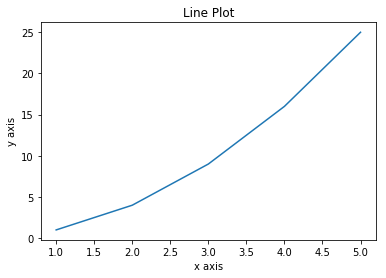

In [3]:
plt.plot(x, y)
plt.ylabel("y axis")
plt.xlabel("x axis")
plt.title("Line Plot")
plt.show()

## Multiple plots / data series in one figure

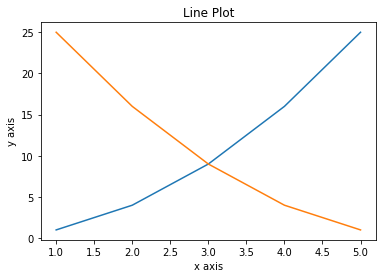

In [4]:
x = [1, 2, 3, 4, 5]
y_1 = [1, 4, 9, 16, 25]
y_2 = [25, 16, 9, 4, 1]

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.ylabel("y axis")
plt.xlabel("x axis")
plt.title("Line Plot")
plt.show()

# Creating multiple figures

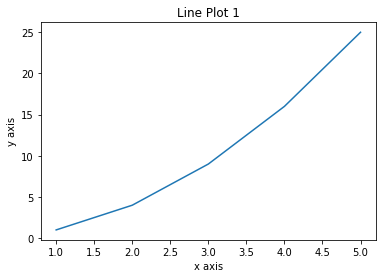

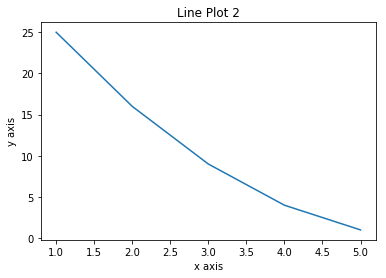

In [5]:
plt.figure()
plt.plot(x, y_1)
plt.ylabel("y axis")
plt.xlabel("x axis")
plt.title("Line Plot 1")

plt.figure()
plt.plot(x, y_2)
plt.ylabel("y axis")
plt.xlabel("x axis")
plt.title("Line Plot 2")

plt.show()

# Bar plot

## Simple bar plot example

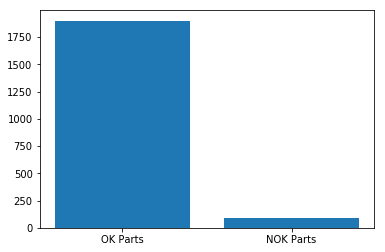

In [6]:
import matplotlib.pyplot as plt

x = ["OK Parts", "NOK Parts"]
counts = [1900, 90]

plt.bar(x, counts)

plt.show()

## Bar plot with your data

In [2]:
df = pd.read_csv("data/preprocessed_data/csv_without_empty_cols/dc_final.csv", index_col=0)

In [8]:
display(df.head(5))

,ModuleSerial,FirstTimeStamp,dc_finalHistoryId,ChangeCount,HistoryId,TxnId,DataCollectionDefId,ModuleSerialNum,ModuleType,ModulePartNum,...,SpecDate,SpecFreq_GHz,IsRetest,Rework,OriginalPartNum,TestStation,CDOTypeId,HistoryMainlineId,IsSampling,IsOutlier
0,A07BHFN,2018-08-16 10:34:46,4802d4400a05bc49,1,0007a8402220fcec,2000000218a548bc,0006fe800000601c,A07BHFN,SFP,FTLX8574D3BCL,...,5/17/2018,10.3,no,no,FTLX8574D3BCL,IPH_MODTEST530,4719316,000988421597e4b5,No,NaN
1,A07BHD7,2018-08-16 10:34:59,4802d4400a05bc5d,1,0007a8402220ff6d,2000000218a548a7,0006fe800000601c,A07BHD7,SFP,FTLX8574D3BCL,...,5/17/2018,10.3,no,no,FTLX8574D3BCL,IPH_MODTEST133,4719316,000988421597e47a,No,NaN
2,A07BH62,2018-08-16 10:34:50,4802d4400a05bc85,1,0007a8402220df00,2000000218a5495b,0006fe800000601c,A07BH62,SFP,FTLX8574D3BCL,...,5/17/2018,10.3,no,no,FTLX8574D3BCL,IPH_MODTESTER27,4719316,000988421597e542,No,NaN
3,A07BHFP,2018-08-16 10:35:00,4802d4400a05bc88,1,0007a8402220fcee,2000000218a54c6f,0006fe800000601c,A07BHFP,SFP,FTLX8574D3BCL,...,5/17/2018,10.3,no,no,FTLX8574D3BCL,IPH_MODTEST410,4719316,000988421597e819,No,NaN
4,A07BHE2,2018-08-16 10:35:11,4802d4400a05bc79,1,0007a8402220fc56,2000000218a54c8e,0006fe800000601c,A07BHE2,SFP,FTLX8574D3BCL,...,5/17/2018,10.3,no,no,FTLX8574D3BCL,IPH_MODTESTER84,4719316,000988421597e86b,No,NaN


In [3]:
def plot_value_counts(feature_name, dataframe, save_to_file=False, path_result="../results/exploration/plots/"):
    """
    Plots the value counts of a categorical feature as a bar plot.
    
    Parameters
    ----------
    feature_name (string): Name of the feature to be plotted
    dataframe (pandas.DataFrame): DataFrame containing a column with values for the specified feature
    save_to_file (boolean): If True the created plot is saved as a PNG file, if False the plot is just displayed
    path_result (string): Path to folder, where the plot is to be saved if save_to_file is True
    """
    plt.figure()
    value_counts = dataframe[feature_name].value_counts(dropna=False)
    ax = value_counts.plot(kind="bar")

    counts = value_counts.values

    rectangles = ax.patches
    for rect, count in zip(rectangles, counts):
        height = rect.get_height()
        x = rect.get_x()
        width = rect.get_width()
        count = "{:,}".format(count)
        ax.text(x + width / 2, height + 20, count, ha="center", va="bottom", fontsize=10)

    # format figure
    plt.title(feature_name)
    plt.ylabel("value counts")
    plt.tight_layout()
    if not save_to_file:
        plt.show()
    else:
        plt.savefig(path_result + "value_counts_" + feature_name + ".png")
        plt.close()

In [4]:
% matplotlib qt

plot_value_counts("ErrAbbr", df, save_to_file=False)

# Scatter Plot with your data

In [11]:
def plot_scatter(x, y, data, save_to_file=False, path_result="../results/exploration/plots/"):
    """
    Creates a scatter plot.
    
    Parameters
    ----------
    x (string): Name of feature for x-axis
    y (string): Name of feature for y-axis
    data (pamdas.DataFrame): DataFrame comprising 0_data for x and y
    save_to_file (boolean): If True the plot is saved, if False the plot is just shown
    path_result (string): Path to folder, where the plot is to be saved if save_to_file is True
    """
    plt.figure()
    sns.scatterplot(x=x, y=y, data=data)
    plt.tight_layout()
    
    if save_to_file:
        plt.savefig(path_result + "scatter_" + x + "_" + y + ".png")
    else:
        plt.show()


In [12]:
df = pd.read_csv("data/preprocessed_data/csv_without_empty_cols_and_merged/all_data.csv",
                     index_col=0,
                     na_values=[-99999, -9999])


C:\Users\mb335485\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
df.drop_duplicates(inplace=True)
df.dropna(subset=["T_PO_W", "TxOma_mW"], inplace=True)

print(df.shape)

(39597, 88)


In [21]:
% matplotlib qt

plot_scatter("T_PO_W", "TxOma_mW", df)

# Adding a legend

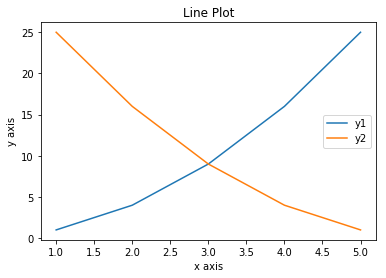

In [15]:
% matplotlib inline

x = [1, 2, 3, 4, 5]
y_1 = [1, 4, 9, 16, 25]
y_2 = [25, 16, 9, 4, 1]

plt.plot(x, y_1, label="y1")
plt.plot(x, y_2, label="y2")

plt.legend()

plt.ylabel("y axis")
plt.xlabel("x axis")
plt.title("Line Plot")
plt.show()

# Formatting example

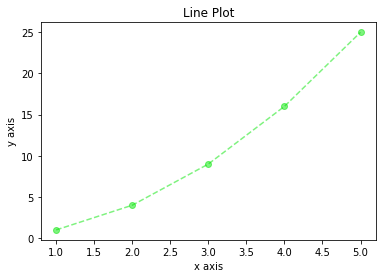

In [16]:
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

plt.plot(x, y, color=(0, 0.9, 0), linestyle="--", marker="o", alpha=0.5)

plt.ylabel("y axis")
plt.xlabel("x axis")
plt.title("Line Plot")

plt.show()

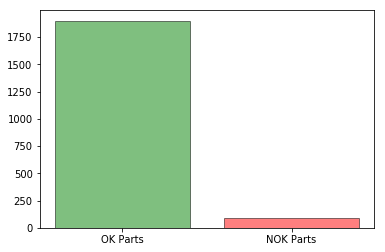

In [17]:
import matplotlib.pyplot as plt

x = ["OK Parts", "NOK Parts"]
counts = [1900, 90]

plt.bar(x, counts, edgecolor="k", color=["g", "r"], alpha=0.5)

plt.show()